# SVR

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [14]:
def test_function(x):
    return 3 + 2*np.log(x) + 4*np.sin(x)

def test_result(y_pred, y_test):
    if y_pred.shape == y_test.shape :
        MAE = sum(abs(y_test-y_pred))/len(y_test)
        RMSE = np.sqrt(sum((y_test-y_pred)**2)/len(y_test))
        R2 = 1-sum((y_test-y_pred)**2)/sum((y_test-y_test.mean())**2)
    return np.array([round(MAE,4),round(RMSE,4), round(R2,4)])

## y=3+2log(x)+4sin(x) 함수에서 노이즈를 주어 생성한 데이터를 사용한다.

Text(0.5, 1.0, 'Sample data plot')

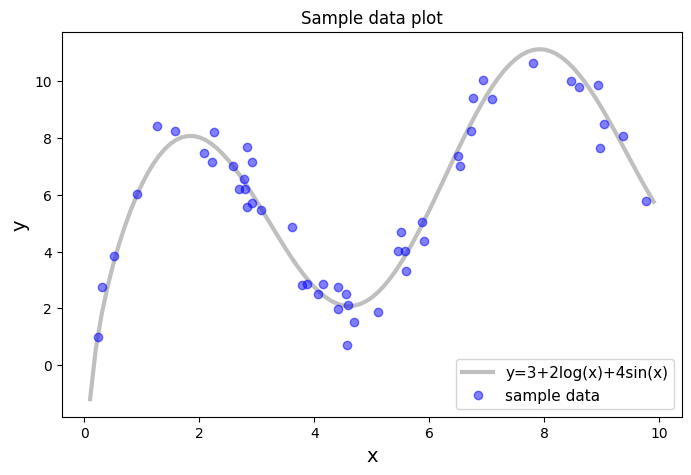

In [10]:
n_samples = 50
np.random.seed(3)
x = np.random.rand(n_samples)*10
np.random.seed(1)
y = test_function(x) + np.random.randn(n_samples)/1.5
x = x.reshape(-1,1)

x_range = np.array(range(1,100)).reshape(-1,1)/10
y_actual = test_function(x_range)

plt.figure(figsize=(8,5))
plt.plot(x_range, y_actual, ls='-',marker='', color='grey', lw=3, alpha=0.5, label='y=3+2log(x)+4sin(x)')
plt.plot(x,y,ls='',marker='o', c='b', alpha=0.5, label='sample data')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend(loc=4, prop={'size': 11})
plt.title('Sample data plot')

In [12]:
X_train, y_train = x.copy(), y.copy()

### 1. Linear SVR - Hyperparameter C에 따른 결과

###### C가 작아질수록 fitting의 오차를 무시하게 됨으로 기울기가 0에 가까워진다.

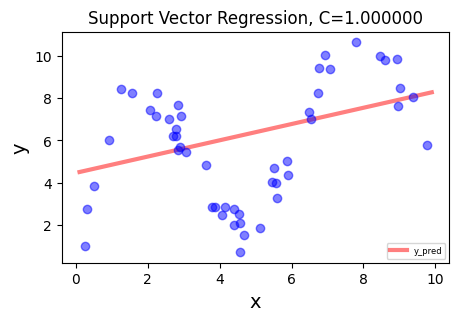

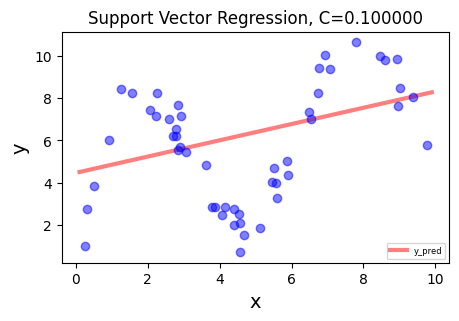

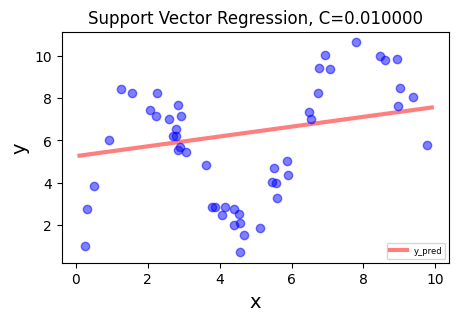

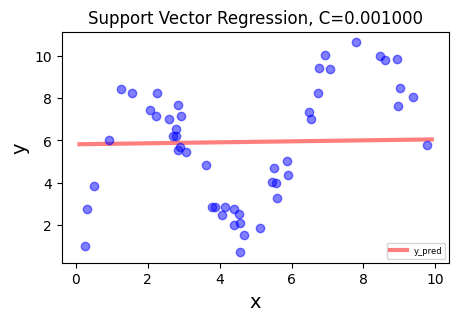

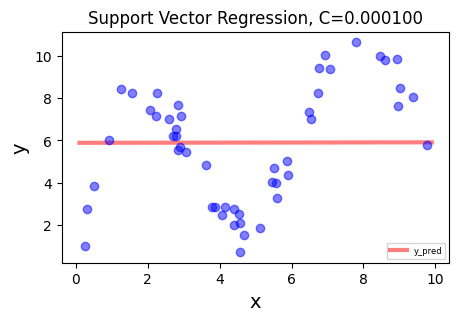

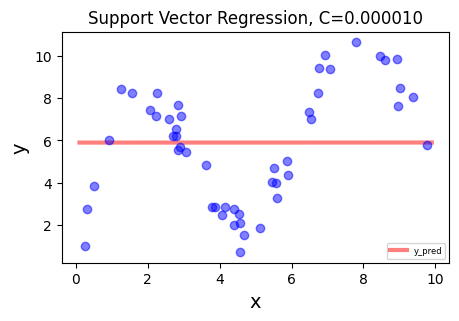

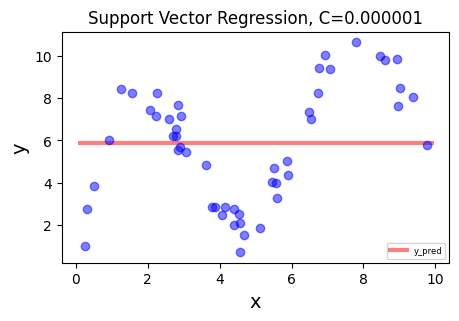

In [31]:
c_list = [1,1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6]
result_sum = []

for C in c_list :
    epsilon = 0
    clf = SVR(C=C, epsilon=epsilon, kernel='linear')
    clf.fit(X_train, y_train)     
    
    y_pred1 = clf.predict(X_train)
    y_pred3 = clf.predict(x_range)
    
    plt.figure(figsize=(5,3))
    plt.fill_between(x_range.reshape(-1,), y_pred3.reshape(-1,)+epsilon, y_pred3.reshape(-1,)-epsilon, alpha=0.3)
    plt.plot(x_range, y_pred3, ls='-',marker='', color='r', lw=3, alpha=0.5, label='y_pred')
    plt.plot(X_train,y_train,ls='',marker='o', c='b', alpha=0.5)
    plt.xlabel('x', fontsize=14)
    plt.ylabel('y', fontsize=14)
    plt.legend(loc=4, prop={'size': 6})
    plt.title('Support Vector Regression, C=%f'%C)
    
    result = np.zeros((1,3))
    result[0,0], result[0,1], result[0,2] = test_result(y_pred1, y_train)
    
    result_sum = np.append(result_sum, C)
    result_sum = np.append(result_sum, clf.coef_)
    result_sum = np.append(result_sum, result)

result_sum = result_sum.reshape(-1,5)

### 2. Linear SVR - Hyperparameter epsilon에 따른 결과

###### epsilon의 크기가 클수록 epsilon tube가 커지고 이에 따라 epsilon tube의 오차 허용 범위가 넓어진다.

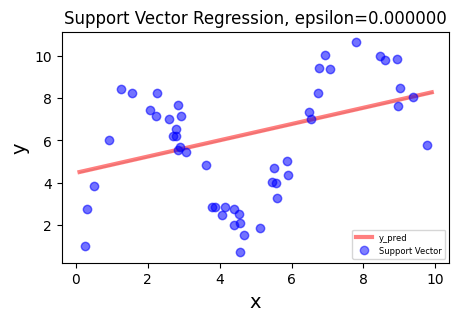

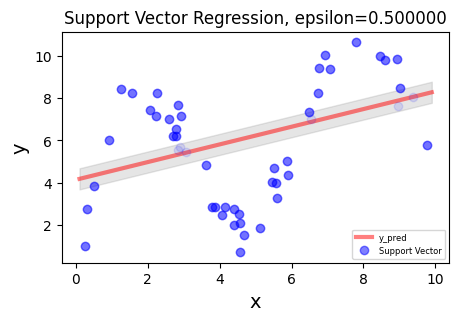

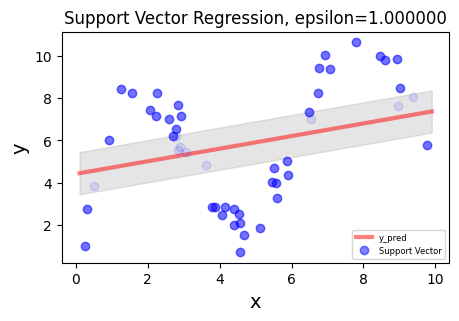

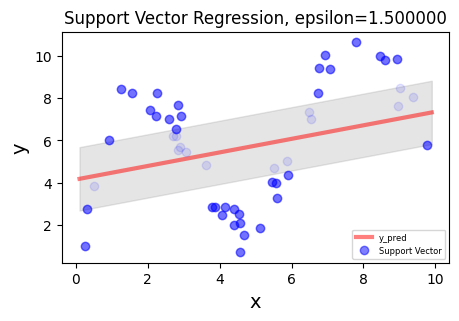

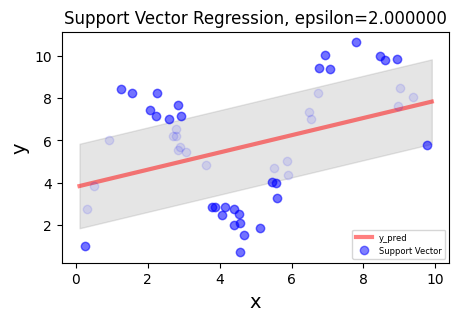

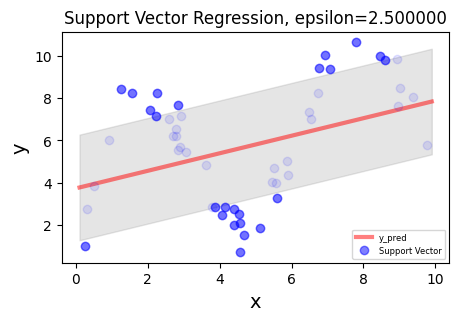

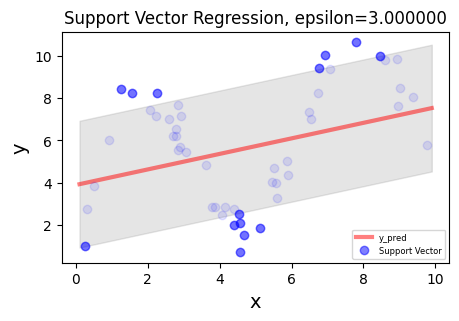

In [32]:
C = 0.1
epsilon_list = [0, 0.5, 1, 1.5, 2, 2.5, 3]
result_sum = []
for epsilon in epsilon_list :
    clf = SVR(C=C, epsilon=epsilon, kernel='linear')
    clf.fit(X_train, y_train)     
    
    y_pred1 = clf.predict(X_train)
    y_pred3 = clf.predict(x_range)
    
    plt.figure(figsize=(5,3))
    plt.fill_between(x_range.reshape(-1,), y_pred3.reshape(-1,)+epsilon, y_pred3.reshape(-1,)-epsilon, alpha=0.2, color='grey')
    plt.plot(x_range, y_pred3, ls='-',marker='', color='r', lw=3, alpha=0.5, label='y_pred')
    plt.plot(X_train,y_train,ls='',marker='o', c='b', alpha=0.1)
    plt.plot(X_train[clf.support_],y_train[clf.support_],ls='',marker='o', c='b', alpha=0.5, label='Support Vector')
    plt.xlabel('x', fontsize=14)
    plt.ylabel('y', fontsize=14)
    plt.legend(loc=4, prop={'size': 6})
    plt.title('Support Vector Regression, epsilon=%f'%epsilon)
    
    result = np.zeros((1,3))
    result[0,0], result[0,1], result[0,2] = test_result(y_pred1, y_train)
    # print(result)
    
    result_sum = np.append(result_sum, epsilon)
    result_sum = np.append(result_sum, clf.coef_)
    result_sum = np.append(result_sum, result)

result_sum = result_sum.reshape(-1,5)

### 3. RBF Kernel SVR - Hyperparameter C에 따른 결과

###### C가 클수록 complex한 식을 만들기 때문에 overfitting이 되고, C가 작을수록 general한 식을 만들기 때문에 underfitting이 되는 것을 확인할 수 있다.

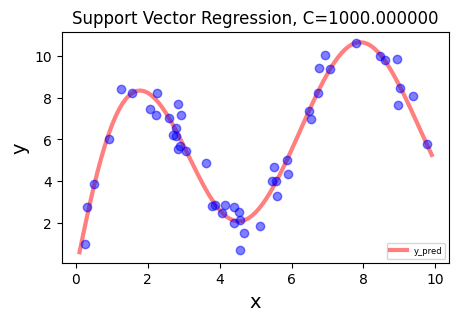

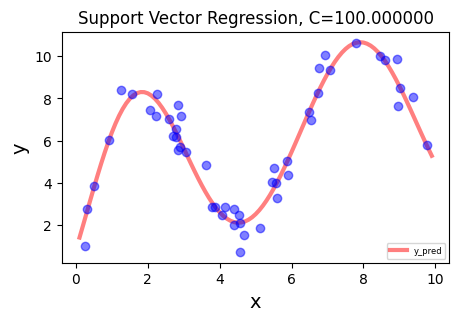

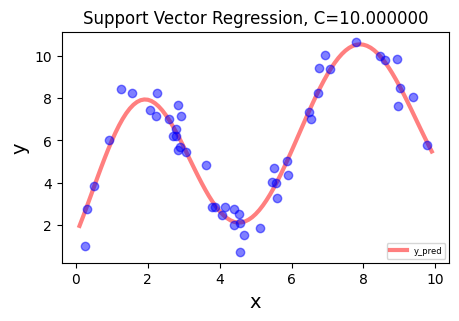

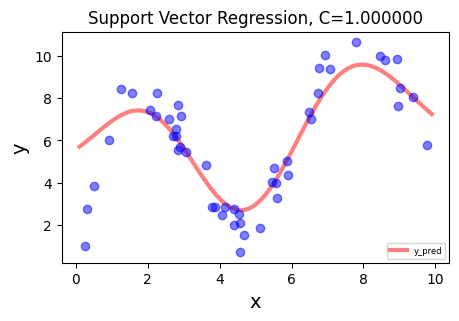

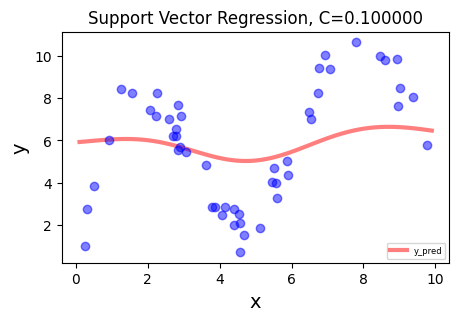

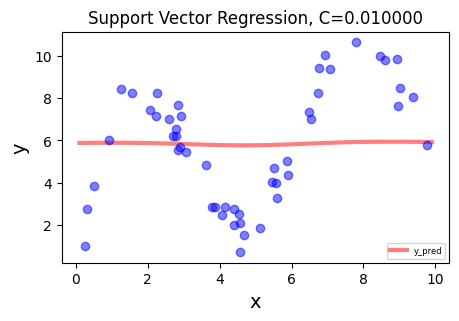

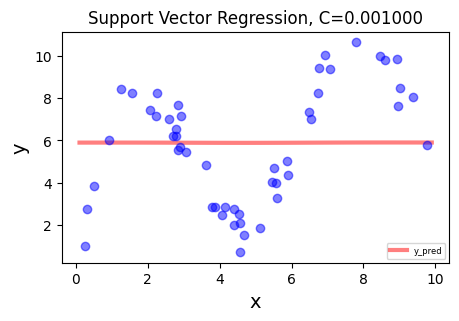

In [37]:
c_list = [1000,100, 10,1,1E-1, 1E-2, 1E-3]
result_sum = []

for C in c_list :
    epsilon = 0
    clf = SVR(C=C, epsilon=epsilon, kernel='rbf')
    clf.fit(X_train, y_train)     
    
    y_pred1 = clf.predict(X_train)
    y_pred3 = clf.predict(x_range)
    
    plt.figure(figsize=(5,3))
    plt.fill_between(x_range.reshape(-1,), y_pred3.reshape(-1,)+epsilon, y_pred3.reshape(-1,)-epsilon, alpha=0.3)
    plt.plot(x_range, y_pred3, ls='-',marker='', color='r', lw=3, alpha=0.5, label='y_pred')
    plt.plot(X_train,y_train,ls='',marker='o', c='b', alpha=0.5)
    plt.xlabel('x', fontsize=14)
    plt.ylabel('y', fontsize=14)
    plt.legend(loc=4, prop={'size': 6})
    plt.title('Support Vector Regression, C=%f'%C)
    
    result = np.zeros((1,3))
    result[0,0], result[0,1], result[0,2] = test_result(y_pred1, y_train)
    
    result_sum = np.append(result_sum, C)
    result_sum = np.append(result_sum, result)

result_sum = result_sum.reshape(-1,4)

### 4. RBF Kernel SVR - Hyperparameter epsilon에 따른 결과

###### epsilon이 커질수록 general한 fitting을 보여주고 epsilon tube가 커지는 것을 확인할 수 있다. 이는 데이터에 따라 다른 결과를 보일 수 있다. 

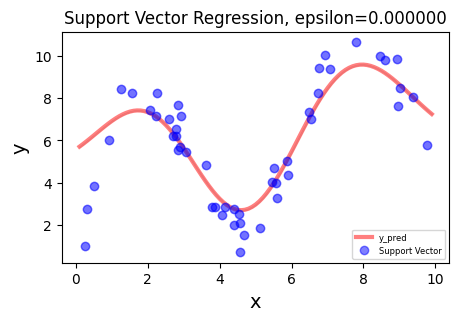

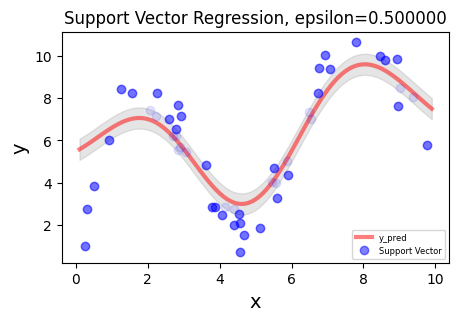

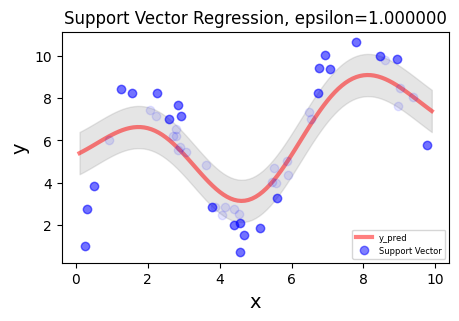

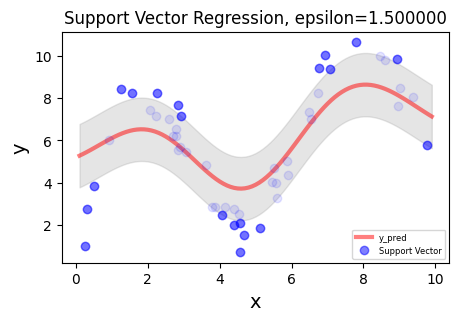

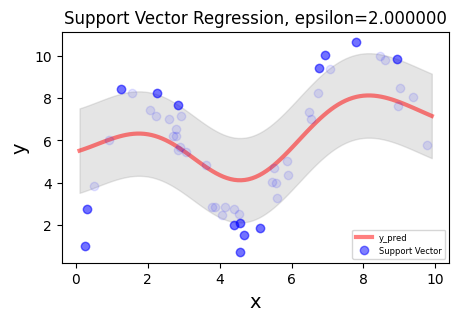

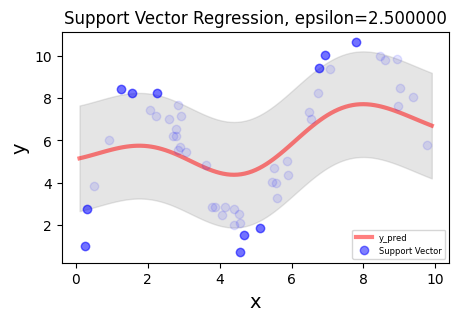

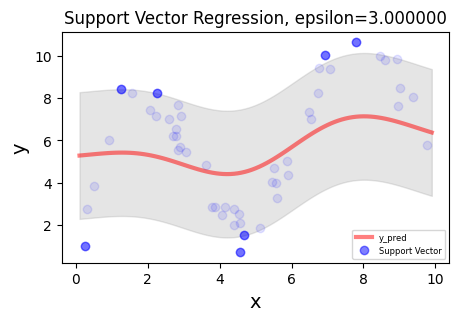

In [38]:
C = 1
epsilon_list = [0, 0.5, 1, 1.5, 2, 2.5, 3]
result_sum = []
for epsilon in epsilon_list :
    clf = SVR(C=C, epsilon=epsilon, kernel='rbf')
    clf.fit(X_train, y_train)     
    
    y_pred1 = clf.predict(X_train)
    y_pred3 = clf.predict(x_range)
    
    plt.figure(figsize=(5,3))
    plt.fill_between(x_range.reshape(-1,), y_pred3.reshape(-1,)+epsilon, y_pred3.reshape(-1,)-epsilon, alpha=0.2, color='grey')
    plt.plot(x_range, y_pred3, ls='-',marker='', color='r', lw=3, alpha=0.5, label='y_pred')
    plt.plot(X_train,y_train,ls='',marker='o', c='b', alpha=0.1)
    plt.plot(X_train[clf.support_],y_train[clf.support_],ls='',marker='o', c='b', alpha=0.5, label='Support Vector')
    plt.xlabel('x', fontsize=14)
    plt.ylabel('y', fontsize=14)
    plt.legend(loc=4, prop={'size': 6})
    plt.title('Support Vector Regression, epsilon=%f'%epsilon)
    
    result = np.zeros((1,3))
    result[0,0], result[0,1], result[0,2] = test_result(y_pred1, y_train)
    
    result_sum = np.append(result_sum, epsilon)
    result_sum = np.append(result_sum, result)

result_sum = result_sum.reshape(-1,4)


### 5. RBF Kernel SVR - Hyperparameter gamma에 따른 결과

###### gamma가 커질수록 complex하게 fitting하며 overfitting의 경향성을 보이는 것을 확인할 수 있다. 

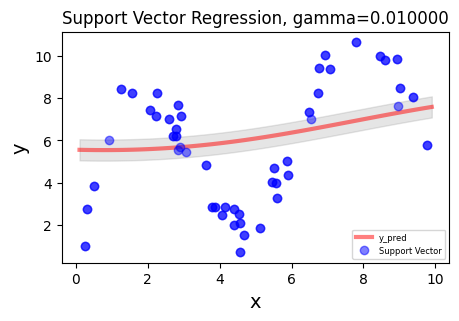

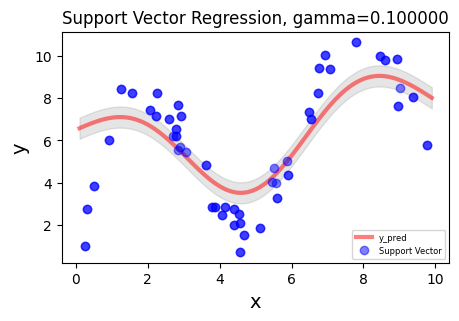

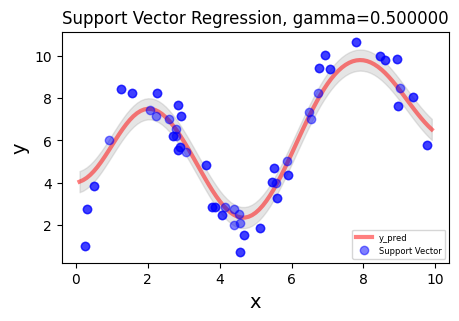

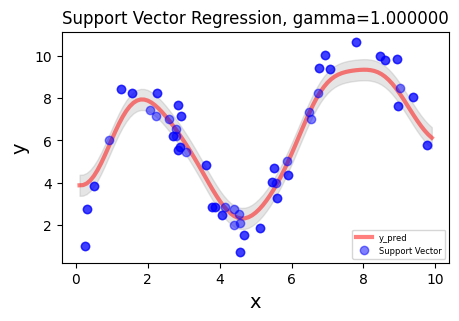

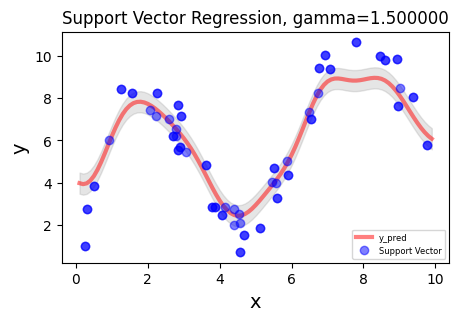

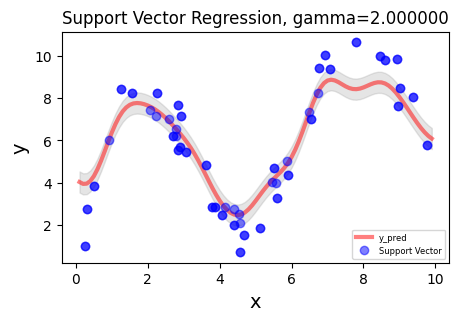

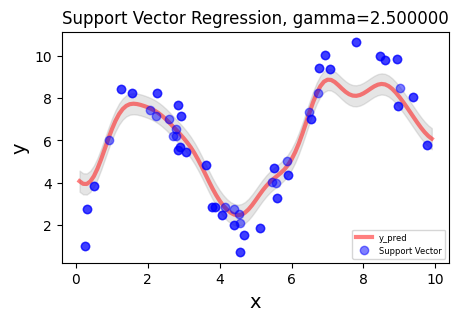

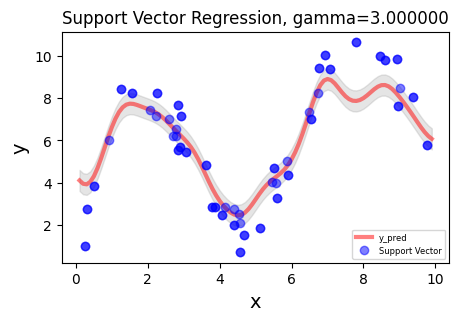

In [40]:
C = 1
epsilon = 0.5
gamma_list = [0.01, 0.1, 0.5, 1, 1.5, 2, 2.5, 3]
result_sum = []
for gamma in gamma_list :
    clf = SVR(C=C, epsilon=epsilon, kernel='rbf', gamma=gamma)
    clf.fit(X_train, y_train)     
    
    y_pred1 = clf.predict(X_train)
    y_pred3 = clf.predict(x_range)
    
    plt.figure(figsize=(5,3))
    plt.fill_between(x_range.reshape(-1,), y_pred3.reshape(-1,)+epsilon, y_pred3.reshape(-1,)-epsilon, alpha=0.2, color='grey')
    plt.plot(x_range, y_pred3, ls='-',marker='', color='r', lw=3, alpha=0.5, label='y_pred')
    plt.plot(X_train,y_train,ls='',marker='o', c='b', alpha=0.5)
    plt.plot(X_train[clf.support_],y_train[clf.support_],ls='',marker='o', c='b', alpha=0.5, label='Support Vector')
    plt.xlabel('x', fontsize=14)
    plt.ylabel('y', fontsize=14)
    plt.legend(loc=4, prop={'size': 6})
    plt.title('Support Vector Regression, gamma=%f'%gamma)
    result = np.zeros((1,3))
    result[0,0], result[0,1], result[0,2] = test_result(y_pred1, y_train)
    
    result_sum = np.append(result_sum, gamma)
    result_sum = np.append(result_sum, result)

result_sum = result_sum.reshape(-1,4)

###### reference
###### https://changhyun-lee.github.io/example/Support-Vector-Machine